In [1]:
"""
Two period job search in the IID case.
"""

using Distributions

"Creates an instance of the job search model, stored as a NamedTuple."
function create_job_search_model(;
        n=50,        # wage grid size
        w_min=10.0,  # lowest wage
        w_max=60.0,  # highest wage
        a=200,       # wage distribution parameter
        b=100,       # wage distribution parameter
        β=0.96,      # discount factor
        c=10.0       # unemployment compensation
    )
    w_vals = collect(LinRange(w_min, w_max, n+1))
    ϕ = pdf(BetaBinomial(n, a, b))
    return (; n, w_vals, ϕ, β, c)
end

" Computes lifetime value at t=1 given current wage w_1 = w. "
function v_1(w, model)
    (; n, w_vals, ϕ, β, c) = model
    h_1 = c + β * max.(c, w_vals)'ϕ
    return max(w + β * w, h_1)
end

" Computes reservation wage at t=1. "
function res_wage(model)
    (; n, w_vals, ϕ, β, c) = model
    h_1 = c + β * max.(c, w_vals)'ϕ
    return h_1 / (1 + β)
end


# == Plots == #

using PyPlot
using LaTeXStrings
PyPlot.matplotlib[:rc]("text", usetex=true) # allow tex rendering

default_model = create_job_search_model()

" Plot the distribution of wages. "
function fig_dist(model=default_model, fs=14)
    fig, ax = plt.subplots()
    ax.plot(model.w_vals, model.ϕ, "-o", alpha=0.5, label="wage distribution")
    ax.legend(loc="upper left", fontsize=fs)
end


" Plot two-period value function and res wage. "
function fig_v1(model=default_model; savefig=false, 
                  figname="./figures/iid_job_search_0.pdf", fs=18)

    (; n, w_vals, ϕ, β, c) = model

    v = [v_1(w, model) for w in model.w_vals]
    w_star = res_wage(model)
    continuation_val = c + β * max.(c, w_vals)'ϕ
    min_w, max_w = minimum(w_vals), maximum(w_vals)

    fig, ax = plt.subplots(figsize=(9, 5.5))
    ax.set_ylim(0, 120)
    ax.set_xlim(min_w, max_w)
    ax.vlines((w_star,), (0,), (continuation_val,), lw=0.5)
    ax.set_yticks((0, 50, 100))
    ax.set_yticklabels((0, 50, 100), fontsize=12)
    ax.set_xticks((min_w, w_star, max_w))
    ax.set_xticklabels((min_w, L"$w^*_1$", max_w), fontsize=12)
    ax.plot(w_vals, w_vals + β * w_vals, "-", alpha=0.8, lw=3, 
            label=L"$w_1 + \beta w_1$")
    ax.plot(w_vals, fill(continuation_val, n+1), lw=3, alpha=0.8, 
            label=L"$c + \beta \sum_{w'} \max\{c, w'\} \varphi(w')$" )
    ax.plot(w_vals, v, "k--", ms=2, alpha=1.0, lw=2, label=L"$v_1(w_1)$")
    ax.legend(frameon=false, fontsize=fs, loc="upper left")
    if savefig
        fig.savefig(figname)
    end
end

fig_v1

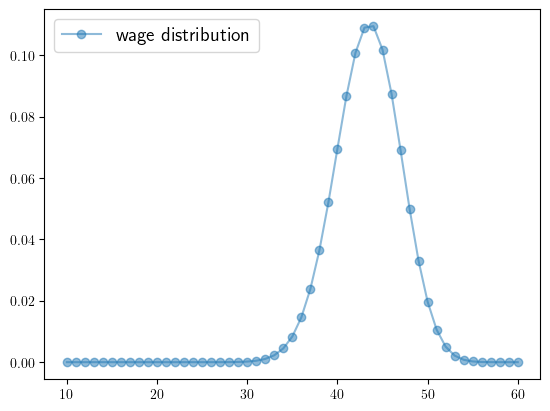

PyObject <matplotlib.legend.Legend object at 0x7f6f7ffd69e0>

In [2]:
fig_dist()

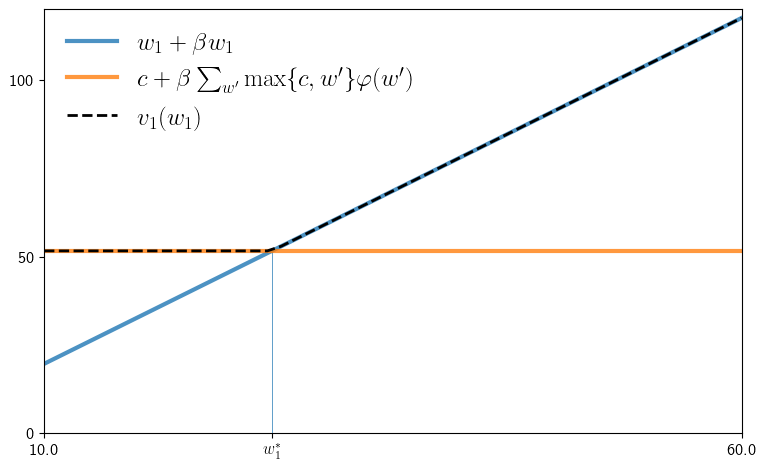

In [3]:
fig_v1()